In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
from scipy.optimize import fsolve

1) y'' + 9y = cos(t), y(π) = −5/3, y'(0) = 5 with solve ivp

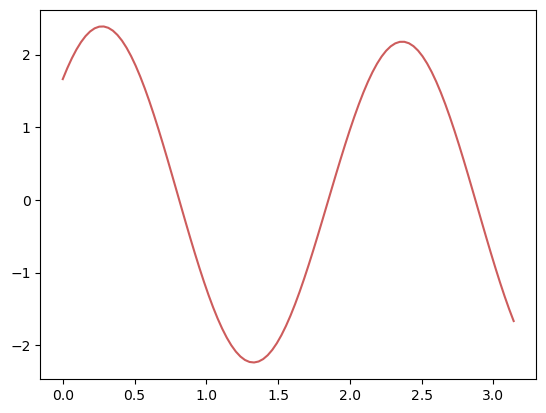

In [2]:
def ode(t, Y):
    
    y, yp = Y
    ypp = -9*y + np.cos(t)
    
    return np.array([yp, ypp])

def objective(u):
    
    r = np.zeros(len(u))
    # the initial value of y(0) is not known - u[0]
    sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
    y, yp = sol.y
    r[0] = y[-1] + 5/3 # as y(π) + 5/3 = 0 
    
    return r

t = np.linspace(0, np.pi, 100)

# the starting estimate for the roots o
u = 0.5
# fsolve returns the roots of f(x) = 0
u = fsolve(objective, u)

sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
y, yp = sol.y

plt.plot(sol.t, y, color = 'indianred')

1) y'' + 9y = cos(t), y(π) = −5/3, y'(0) = 5 with solve_bvp

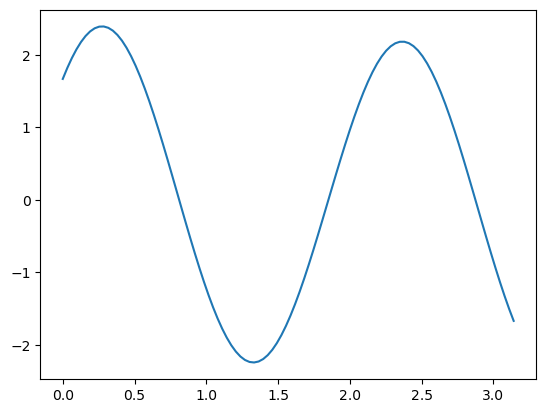

In [3]:
def ode(x, Y):
    
    y, yp = Y
    ypp = -9*y + np.cos(x)
    
    return np.array([yp, ypp])

def bc(ya, yb):
    return np.array([ya[1] - 5, yb[0] + 5/3])

x = np.linspace(0, np.pi, 100)
y = np.zeros((2, x.size))

sol = solve_bvp(ode, bc, x, y)

y, yp = sol.y

plt.plot(sol.x, y)

2) y''''(x) = x, y(0) = 0, y(1) = 0, y''(0) = 0, y''(1) = 0 with solve_bvp

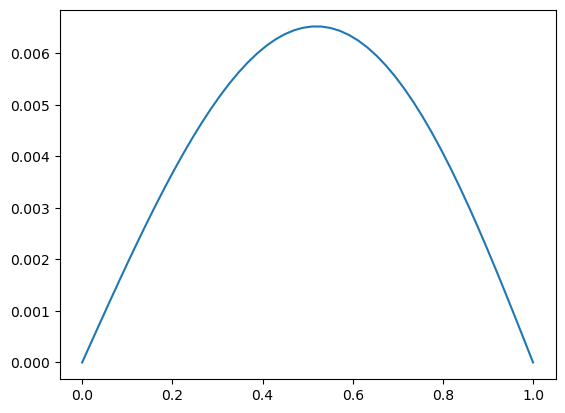

In [4]:
def fun(x, Y):
    
    y, yp, ypp, yppp = Y
    ypppp = x
    
    return [yp, ypp, yppp, ypppp]

# ya: lower boundary which is 0 and yb: maximum boundary which is 1 for this example
def bc(ya, yb):
    # ya[0] = y(0), ya[1] = y'(0), ya[2] = y''(0) vs yb[0] = y(1), yb[1] = y'(1), yb[2] = y''(1)
    return np.array([ya[0] - 0, yb[0] - 0, ya[2] - 0, yb[2] - 0])

x = np.linspace(0, 1, 50)
y = np.zeros((4, x.size)) # because wigh have 4 arrays from to return from bc function

sol = solve_bvp(fun, bc, x, y)

y, yp, ypp, yppp = sol.y

plt.plot(sol.x, y)

3) y'' + k**2 * y = 0, y(0) = y(1) = 0

Text(0, 0.5, 'y')

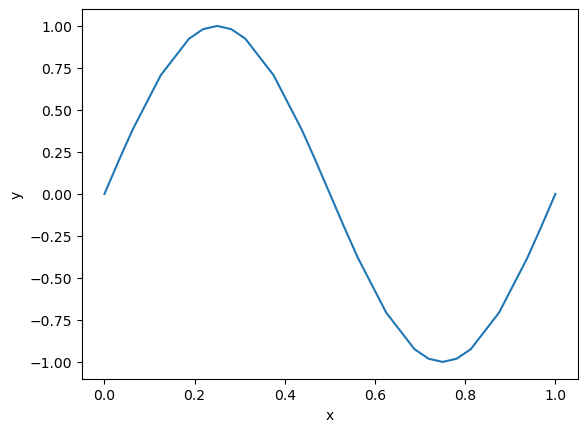

In [5]:
from scipy.integrate import solve_bvp

def fun(x, Y, k):
    
    y, yp = Y
    ypp = -y*k**2
    
    return [yp, ypp]

# ya stands for y(0) and yb stands for y(1)
def bc(ya, yb, p):
    k = p[0]
    'boundary condition residual'
    return np.array([ya[0] - 0, yb[0] - 0, ya[1] - k]) # y'(0) = k

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1

# solve bvp
sol = solve_bvp(fun, bc, x, y, p=[6])

y, yp = sol.y

plt.plot(sol.x, y)
plt.xlabel("x")
plt.ylabel("y")

***In numerical analysis, the shooting method is a method for solving a boundary value problem by reducing it to an initial value problem.***